최근 환율 상승이 주가 하락의 원인이라는 분석은 잘못된 것으로 보입니다. 환율은 원인이 아닌 결과일 뿐이며, 오히려 환율 상승은 수출에 도움

환율과 수출간의 상관관계를 분석할 필요있을까?

구조적 성장기에 기업의 어느 재무지표가 그것을 반영했는지 찾아봐야 한다.

통화 노출도

# 1️⃣ Import Data and Wrangling

In [1]:
import pandas as pd

미리 추출되고 정리되어 csv로 저장된 데이터를 불러

In [2]:
currency = pd.read_csv('currencies.csv')
currency.rename(columns={'Unnamed: 0':'date'}, inplace=True)
currency['date'] = pd.to_datetime(currency['date'])

bond = pd.read_csv('bonds.csv')
bond.rename(columns={'Unnamed: 0':'date'}, inplace=True)
bond['date'] = pd.to_datetime(bond['date'])

vix = pd.read_csv('vix.csv')
vix['Date'] = pd.to_datetime(vix['Date'])

korea_trade = pd.read_csv('Korea_Export.csv')
korea_trade['date'] = pd.to_datetime(korea_trade['date'])
korea_trade = korea_trade[[col for col in korea_trade if not col.startswith('Unnamed')]]

ohlcv = pd.read_csv('ohlcv_009540.csv')
ohlcv['date'] = pd.to_datetime(ohlcv['date'])

marcap = pd.read_csv('marcap_009540.csv')
marcap.rename(columns={'날짜':'date','시가총액':'marcap'}, inplace=True)
marcap = marcap[[col for col in marcap if not col.startswith('Unnamed')]]
marcap['date'] = pd.to_datetime(marcap['date'])

fundamental = pd.read_csv('fundamental_009540.csv')
fundamental.rename(columns={'날짜':'date'}, inplace=True)
fundamental = fundamental[[col for col in fundamental if not col.startswith('Unnamed')]]
fundamental['date'] = pd.to_datetime(fundamental['date'])

fs_table = pd.read_csv('fs_table_009540.csv')
fs_table['date'] = pd.to_datetime(fs_table['date'])
fs_table['publish_date'] = pd.to_datetime(fs_table['publish_date'])


### Check the data structure and verify the date column

In [3]:
# print last 5 rwos for each dataframe from csv
print(currency.tail())
print(currency. info())

           date  us_dollar_index  usd_krw  usd_jpy  eur_usd  usd_cny  usd_aud  \
2371 2025-01-31          108.217  1455.70   155.18   1.0362   7.2507   1.6095   
2372 2025-02-02          109.360      NaN   155.35      NaN   7.1868   1.6276   
2373 2025-02-03          108.877  1458.57   154.75   1.0344   7.2507   1.6057   
2374 2025-02-04          107.823  1452.53   154.15   1.0377   7.2507   1.5985   
2375 2025-02-05          107.460  1444.82   152.54   1.0398   7.2719   1.5906   

      usd_cad  usd_chf  usd_sgd  usd_gbp  
2371   1.4524   0.9107   1.3583   0.8067  
2372   1.4713   0.9152   1.3681   0.8137  
2373   1.4428   0.9101   1.3590   0.8031  
2374   1.4339   0.9054   1.3513   0.8013  
2375   1.4314   0.9012   1.3482   0.7996  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2376 non-null   date

In [4]:
print(bond.tail())
print(bond. info())

           date  us_3m  us_2y  us_1y  us_10y  us_30y  us_5y  kr_10y  kr_5y  \
3103 2025-02-03  4.296  4.249  4.193   4.551   4.783  4.360   2.832  2.689   
3104 2025-02-04  4.320  4.214  4.178   4.512   4.746  4.318   2.832  2.704   
3105 2025-02-05  4.317  4.187  4.167   4.423   4.642  4.249   2.810  2.685   
3106 2025-02-06  4.322  4.212  4.182   4.435   4.640  4.274   2.766  2.665   
3107 2025-02-07  4.341  4.291  4.238   4.494   4.693  4.347   2.840  2.717   

      kr_3y  kr_2y  kr_1y  
3103  2.575  2.665  2.672  
3104  2.586  2.678  2.690  
3105  2.579  2.668  2.690  
3106  2.579  2.663  2.684  
3107  2.626  2.716    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3108 non-null   datetime64[ns]
 1   us_3m   2370 non-null   float64       
 2   us_2y   2374 non-null   float64       
 3   us_1y   2371 non-null   float64

In [5]:
print(vix.tail())
print(vix. info())

           Date       Open       High        Low      Close
2284 2025-02-03  20.360001  20.420000  17.660000  18.620001
2285 2025-02-04  18.780001  19.110001  16.780001  17.209999
2286 2025-02-05  17.540001  17.750000  15.770000  15.770000
2287 2025-02-06  15.880000  16.150000  14.990000  15.500000
2288 2025-02-07  15.380000  16.660000  14.790000  16.540001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2289 non-null   datetime64[ns]
 1   Open    2289 non-null   float64       
 2   High    2289 non-null   float64       
 3   Low     2289 non-null   float64       
 4   Close   2289 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 89.5 KB
None


In [6]:
print(korea_trade.tail())
print(korea_trade. info())

          date item category  avg_daily_amount_usd   avg_usdkrw  \
322 2024-12-10   선박       수출          1.544943e+08  1418.525714   
323 2024-12-20   선박       수출          1.241547e+08  1438.562500   
324 2024-12-31   선박       수출          1.415744e+08  1464.620000   
325 2025-01-10   선박       수출          1.642640e+08  1464.760000   
326 2025-01-20   선박       수출          1.236945e+08  1454.255000   

     avg_daily_amount_krw  
322          2.191541e+11  
323          1.786043e+11  
324          2.073527e+11  
325          2.406073e+11  
326          1.798833e+11  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  327 non-null    datetime64[ns]
 1   item                  327 non-null    object        
 2   category              327 non-null    object        
 3   avg_daily_amount_usd  327 non-

In [7]:
print(ohlcv.tail())
print(ohlcv. info())

           date    open    high     low   close  volumn  change_pct
2228 2025-02-03  223500  232500  223000  226000  248059   -2.586207
2229 2025-02-04  229000  234000  225500  232000  209976    2.654867
2230 2025-02-05  234000  234000  224500  225500  228138   -2.801724
2231 2025-02-06  227500  237500  225000  228000  343354    1.108647
2232 2025-02-07  230000  230500  222500  225500  238012   -1.096491
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2233 non-null   datetime64[ns]
 1   open        2233 non-null   int64         
 2   high        2233 non-null   int64         
 3   low         2233 non-null   int64         
 4   close       2233 non-null   int64         
 5   volumn      2233 non-null   int64         
 6   change_pct  2233 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory

In [8]:
print(marcap.tail())
print(marcap.info())

           date         marcap
2228 2016-01-08  6460000000000
2229 2016-01-07  6399200000000
2230 2016-01-06  6536000000000
2231 2016-01-05  6437200000000
2232 2016-01-04  6498000000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2233 non-null   datetime64[ns]
 1   marcap  2233 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 35.0 KB
None


In [9]:
print(fundamental.tail())
print(fundamental.info())

           date  PER   PBR  EPS     BPS  DIV  DPS
2228 2016-01-08  0.0  0.43    0  199655  0.0    0
2229 2016-01-07  0.0  0.42    0  199655  0.0    0
2230 2016-01-06  0.0  0.43    0  199655  0.0    0
2231 2016-01-05  0.0  0.42    0  199655  0.0    0
2232 2016-01-04  0.0  0.43    0  199655  0.0    0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2233 non-null   datetime64[ns]
 1   PER     2233 non-null   float64       
 2   PBR     2233 non-null   float64       
 3   EPS     2233 non-null   int64         
 4   BPS     2233 non-null   int64         
 5   DIV     2233 non-null   float64       
 6   DPS     2233 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 122.2 KB
None


In [10]:
print(fs_table.tail())
print(fs_table.info())

         date publish_date         sales          cogs           gpm  \
30 2023-09-30   2023-11-14  2.024848e+13  1.928076e+13  9.677177e+11   
31 2023-12-31   2024-03-21  2.129621e+13  2.024818e+13  1.048027e+12   
32 2024-03-31   2024-05-16  2.196947e+13  2.077526e+13  1.194212e+12   
33 2024-06-30   2024-08-14  2.313132e+13  2.151064e+13  1.620677e+12   
34 2024-09-30   2024-11-14  2.436587e+13  2.233541e+13  2.030455e+12   

              op    net_income     inventory  account_payable  \
30  2.383536e+11  2.120306e+10  2.174245e+12     3.040029e+12   
31  2.822607e+11  1.449303e+11  2.005665e+12     3.203615e+12   
32  4.614675e+11  4.901249e+11  2.216194e+12     3.365803e+12   
33  7.666760e+11  8.084949e+11  2.128192e+12     3.468122e+12   
34  1.096126e+12  6.389878e+11  2.337487e+12     3.544746e+12   

    account_receivable  ...        dpo       ccc  sales_mom  sales_yoy  \
30        1.320685e+12  ...  59.362823  3.418319   0.038294   0.204020   
31        1.460129e+12  ... 

In [11]:
print('Currency: ',currency.date.min(), currency.date.max())
print('Bond: ',bond.date.min(), bond.date.max())
print('VIX: ',vix.Date.min(), vix.Date.max())
print('Trade: ', korea_trade.date.min(), korea_trade.date.max())
print('OHLCV: ',ohlcv.date.min(), ohlcv.date.max())
print('MARKET CAP: ',marcap.date.min(), marcap.date.max())
print('Fundamental: ',fundamental.date.min(), fundamental.date.max())
print('Financial Table: ',fs_table.date.min(), fs_table.date.max())

Currency:  2016-01-01 00:00:00 2025-02-05 00:00:00
Bond:  2016-01-04 00:00:00 2025-02-07 00:00:00
VIX:  2016-01-04 00:00:00 2025-02-07 00:00:00
Trade:  2016-01-10 00:00:00 2025-01-20 00:00:00
OHLCV:  2016-01-04 00:00:00 2025-02-07 00:00:00
MARKET CAP:  2016-01-04 00:00:00 2025-02-07 00:00:00
Fundamental:  2016-01-04 00:00:00 2025-02-07 00:00:00
Financial Table:  2016-03-31 00:00:00 2024-09-30 00:00:00


### Merging datasets needed for analysis based on date

Merging according to the analysis objective:

The current objective is to analyze what factors influence stock price fluctuations by using other data and stock OHLCV data (especially including change_pct).
Therefore, the OHLCV data and exchange rate data are merged based on the date.

In [12]:
ohlcv.set_index('date', inplace=True)
currency.set_index('date', inplace=True)
bond.set_index('date', inplace=True)
vix.set_index('Date', inplace=True)
korea_trade.set_index('date', inplace=True)
marcap.set_index('date', inplace=True)
fundamental.set_index('date', inplace=True)
fs_table.set_index('date', inplace=True)

#### Merge other dataframes at once based on OHLCV using join()

In [13]:
dfs_to_join = [currency, bond, vix, korea_trade, marcap, fundamental, fs_table]
df_merged = ohlcv.join(dfs_to_join, how='left')

#### NaN handlling

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
df_merged.isnull().sum()

open                       0
high                       0
low                        0
close                      0
volumn                     0
change_pct                 0
us_dollar_index           14
usd_krw                    2
usd_jpy                    2
eur_usd                    2
usd_cny                    2
usd_aud                    2
usd_cad                    2
usd_chf                    2
usd_sgd                    2
usd_gbp                    2
us_3m                     17
us_2y                     16
us_1y                     17
us_10y                    15
us_30y                    16
us_5y                     15
kr_10y                     0
kr_5y                      0
kr_3y                      0
kr_2y                      2
kr_1y                      3
Open                      73
High                      73
Low                       73
Close                     73
item                    2013
category                2013
avg_daily_amount_usd    2013
avg_usdkrw    

Apply only fill(), keep the missing values at the beginning of the series as they are, or exclude them during separate analysis.

In [20]:
df_merged = df_merged.ffill()

In [17]:
df_merged

,open,high,low,close,volumn,change_pct,us_dollar_index,usd_krw,usd_jpy,eur_usd,...,dpo,ccc,sales_mom,sales_yoy,gpm_mom,gpm_yoy,op_mom,op_yoy,net_income_mom,net_income_yoy
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,79758,79758,77668,77670,283436,-2.619140,99.066,1189.35,119.42,1.0829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,77214,79213,76397,76942,333262,-0.937299,99.599,1189.81,119.05,1.0746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,77214,79031,77214,78123,249992,1.534922,99.364,1199.52,118.46,1.0778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,78123,78123,76397,76489,187157,-2.091574,98.365,1196.29,117.66,1.0934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,74944,77487,74671,77215,214580,0.949156,98.689,1206.94,117.44,1.0929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11,75852,77214,75488,76397,150435,-1.059380,98.882,1203.76,117.75,1.0859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-12,76942,77668,74489,74490,238737,-2.496171,99.122,1209.33,117.62,1.0854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-13,74580,77850,74489,76942,335157,3.291717,99.068,1209.24,117.66,1.0873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-14,76033,76215,74944,76216,174728,-0.943568,99.248,1206.74,118.04,1.0864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

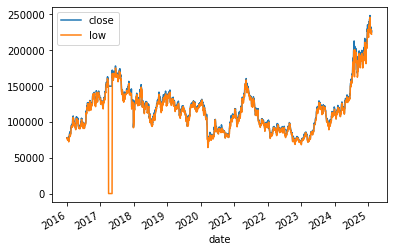

In [24]:
import matplotlib.pyplot as plt

df_merged[['close','low']].plot(kind='line')


# 2️⃣

In [18]:
import pandas as pd
import numpy as np

# NaN이 포함된 DataFrame 생성
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [np.nan, 2, 3, np.nan, 5],
        'C': [1, 2, 3, 4, np.nan]}
df = pd.DataFrame(data)

# ffill() 적용
df_ffill = df.ffill().bfill()

print(df)
print(df_ffill)

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  NaN  3.0  3.0
3  4.0  NaN  4.0
4  5.0  5.0  NaN
     A    B    C
0  1.0  2.0  1.0
1  2.0  2.0  2.0
2  2.0  3.0  3.0
3  4.0  3.0  4.0
4  5.0  5.0  4.0


In [19]:
import pandas as pd
import numpy as np

# NaN이 포함된 DataFrame 생성
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [np.nan, 2, 3, np.nan, 5],
        'C': [1, 2, 3, 4, np.nan]}
df = pd.DataFrame(data)

# ffill() 적용
df_ffill = df.ffill().bfill()

print(df)
print(df_ffill)

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  NaN  3.0  3.0
3  4.0  NaN  4.0
4  5.0  5.0  NaN
     A    B    C
0  1.0  2.0  1.0
1  2.0  2.0  2.0
2  2.0  3.0  3.0
3  4.0  3.0  4.0
4  5.0  5.0  4.0
